### Hydrophobic Count Feature Analysis

#### Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor # Importing our Boosting Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score # Used to evaluted precision of model
from sklearn.model_selection import train_test_split #Split the dataset into training and testing sets

#### Dataset Visualization

In [57]:
# set our dataset equal to ds variable
ds = pd.read_csv('DDH Data with Properties.csv')

# view first 5 lines of dataset
ds.describe() 

,CID,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,...,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D
count,1.040000e+02,104.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.539089e+07,367.867981,3.207921,378.261335,378.221780,101.017822,576.336634,0.0,0.693069,5.732673,...,8.450000,3.750000,0.660000,0.230000,0.320000,3.220000,0.270000,0.798000,4.966000,8.890000
std,4.443420e+07,100.488055,1.609763,78.756938,78.695752,34.974503,156.648286,0.0,0.796776,1.859522,...,1.748737,1.200799,0.781348,0.489382,0.529532,0.847814,0.489382,0.221099,2.364733,2.692657
min,0.000000e+00,0.000000,-0.600000,212.007805,212.007805,34.100000,242.000000,0.0,0.000000,2.000000,...,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600000,0.000000,1.000000
25%,2.799801e+06,309.092500,2.200000,310.120509,310.120509,83.100000,474.000000,0.0,0.000000,5.000000,...,7.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.600000,3.150000,10.000000
50%,1.393569e+07,370.850000,3.400000,372.089226,372.089226,96.900000,554.000000,0.0,0.000000,6.000000,...,9.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.800000,5.000000,10.000000
75%,7.305647e+07,431.425000,4.300000,434.104876,433.845920,120.000000,670.000000,0.0,1.000000,6.000000,...,9.250000,4.000000,1.000000,0.000000,1.000000,4.000000,0.250000,1.000000,7.000000,10.000000
max,1.354276e+08,588.600000,7.300000,588.177766,588.177766,197.000000,960.000000,0.0,3.000000,12.000000,...,13.000000,7.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.400000,12.000000,10.000000


#### Preprocessing

In [58]:
# dropping  non-float values
ds.drop(['CID','SMILES','InChI','InChIKey','IUPACName','MolecularFormula'],axis=1,inplace=True)

# replacing non existing values in columns
ds.replace(np.nan,0,inplace=True)

# replacing binded value with float value
ds = ds[ds['pIC50'] != 'BLINDED']
# ds.loc[ds['pIC50']=='BLINDED',:]
ds['pIC50']=ds['pIC50'].astype('float64')

#### Splitting Dataset

In [59]:
# Setting X equal to all columns except for Hydrophobic Count
X=ds.loc[:,ds.columns!='FeatureHydrophobeCount3D']

# Setting y equal to Hydrophobic Count Analysis
y=ds['FeatureHydrophobeCount3D']

# 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling Data

In [60]:
# Initialize the scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scalling split data
X_train = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

#### Building and Training Model

In [61]:
# XGBoost model built using XGBoost Regreesor
boost_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
# fitting our XGBoost model with the X train and X test sets that have been scaled accordingly with their features.
boost_model.fit(X_train, y_train)
# producing our prediction using our scaled test set
y_pred = boost_model.predict(X_test)

C:\Users\armkz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


#### Evaluating Model

In [62]:
# measuring how precise our model was in its predictions
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.9237662954528413


#### Analysis

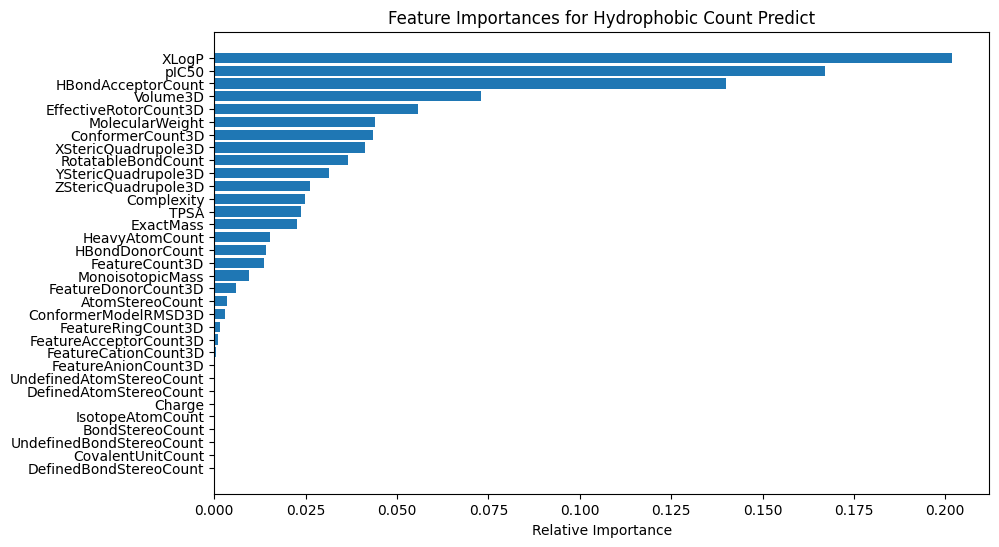

In [63]:
# Plotting Feature Importances
importances = boost_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Hydrophobic Count Predict')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
